In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [4]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

,Unnamed: 0,Nom,Etat,Code_Etat,id_Etat,id_county,NAME,geometry,fips,unemp_rate_year_2013,...,bachelors_deg_year_2018,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop
688,688,Scott,Illinois,IL,150,405,Scott,"POLYGON ((-90.64599 39.703368, -90.64524999999...",17171.0,8.6,...,15.0,4.50,1280613,1344096,1247398,1924070,1601087,2831447,0.204413,0.760743
908,908,Cheyenne,Kansas,KS,27298,28246,Cheyenne,"POLYGON ((-102.051744 40.003077999999995, -101...",20023.0,2.9,...,26.3,0.90,228105,172167,185859,196548,191451,172047,0.133428,0.831796
3169,3169,Douglas,Wisconsin,WI,27333,30448,Douglas,"POLYGON ((-92.293857 46.180073, -92.2935579999...",55031.0,6.0,...,24.0,2.45,434688,334308,383280,561819,526523,452520,0.511246,0.435294
259,259,Clear Creek,Colorado,CO,27287,27590,Clear Creek,"POLYGON ((-105.92703 39.676702999999996, -105....",8019.0,5.4,...,46.5,3.50,514658,413284,454062,540514,496995,524770,0.467281,0.438539
2570,2570,Cass,Texas,TX,27326,29932,Cass,"POLYGON ((-94.65384 32.91704, -94.653673 32.95...",48067.0,8.4,...,16.4,2.45,1633278,1465992,1574266,1721726,1549434,1571632,0.193865,0.791143


In [5]:
gun_violence_db = pd.read_csv('/home/onyxia/work/data/df_gun_violence.csv')
gun_violence_db.sample(5)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,vict_injured,vict_arrested,vict_unharmed,vict_killed,handgun,rifle,Nine_mm,shotgun,young_sus,young_vict
232893,232463,1051104,2018-02-15,North Carolina,Greenville,100 Dixon Dr,0,0,http://www.gunviolencearchive.org/incident/105...,http://www.witn.com/content/news/Two-men-arres...,...,0,0,0,0,0,0,0,0,0,0
131106,128720,581920,2016-06-16,Florida,Wildwood,515 Pitt Street,1,0,http://www.gunviolencearchive.org/incident/581920,http://www.dailycommercial.com/news/article_c2...,...,0,0,0,1,0,0,0,0,0,0
235747,235316,1063589,2018-03-06,Missouri,Saint Louis,1405 Dunn Rd,0,1,http://www.gunviolencearchive.org/incident/106...,http://www.kmov.com/story/37655540/shooting-vi...,...,1,0,0,0,0,0,0,0,0,0
170354,224980,1017290,2017-02-05,Massachusetts,Boston,Stoughton St and Columbia Rd,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.universalhub.com/crime/20170205/two...,...,0,0,0,0,0,0,0,0,0,0
61185,60322,310058,2015-03-16,Ohio,Cincinnati,NaN,0,0,http://www.gunviolencearchive.org/incident/310058,http://www.cincinnati.com/story/news/crime/201...,...,0,0,0,0,1,0,0,0,1,0


In [6]:
from shapely import wkt
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
total_db = total_db.dropna(subset=['geometry'])
total_db['geometry'] = total_db['geometry'].apply(wkt_loads)

In [7]:
total_db = total_db.loc[total_db['Etat'] != 'Alaska']
total_db = total_db.loc[total_db['Etat'] != 'Hawaii']

gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Alaska']
gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Hawaii']

In [8]:
total_db_geo = (
    gpd.GeoDataFrame(total_db)
    .set_geometry('geometry')
    .set_crs('EPSG:4269')
)

In [9]:
#changement de valeur pour Richmond, Virginia car valeur aberrante de 8.755 alors qu'il y avait 204 214	habitants en 2010
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2013'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2014'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2015'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2016'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2017'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2018'] = 204.214 

In [10]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gun_violence_db['longitude'], gun_violence_db['latitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=geometry, crs='EPSG:4326')

gun_violence_geo = gun_violence_geo.set_crs('EPSG:4326')
gun_violence_geo = gun_violence_geo[gun_violence_geo.geometry.x <= -50]

Tentative de merge les deux bases

In [11]:
total_db_geo=total_db_geo.to_crs('EPSG:4326')
merge_geo = gpd.sjoin(gun_violence_geo, total_db_geo, predicate='within')
geom_county=total_db_geo[['id_county','geometry']]
geom_county.head()

,id_county,geometry
0,27336,"POLYGON ((-86.92119 32.65754, -86.92035 32.658..."
1,27337,"POLYGON ((-88.02858 30.22676, -88.02399 30.230..."
2,27338,"POLYGON ((-85.74803 31.61918, -85.74543 31.618..."
3,27339,"POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
4,27340,"POLYGON ((-86.96336 33.85822, -86.95967 33.857..."


In [12]:
merge_geo2=pd.merge(merge_geo, geom_county, on='id_county')
merge_geo2.head()

,Unnamed: 0_left,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop,geometry_y
0,100178,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."
1,104811,481268,2013-10-21,Pennsylvania,Pittsburgh (Homewood),7200 block of Kelly Street,2,5,http://www.gunviolencearchive.org/incident/481268,http://www.wtae.com/news/local/allegheny/two-p...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."
2,678,94128,2014-01-08,Pennsylvania,Homestead,Steak ‘n Shake at The Waterfront,1,0,http://www.gunviolencearchive.org/incident/94128,http://pittsburgh.cbslocal.com/2014/01/22/u-s-...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."
3,801,94504,2014-01-08,Pennsylvania,Munhall,Waterfront Shopping Complex,1,0,http://www.gunviolencearchive.org/incident/94504,http://www.post-gazette.com/local/south/2014/0...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."
4,1324,95999,2014-01-10,Pennsylvania,Pittsburgh,2000 block of Fifth Avenue,0,1,http://www.gunviolencearchive.org/incident/95999,/pittsburgh.cbslocal.com/2014/01/11/man-wounde...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."


In [13]:
merge_geo = merge_geo2.rename(columns={'geometry_x': 'point_geometry', 'geometry_y': 'polygon_geometry'})
merge_geo.head()

,Unnamed: 0_left,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop,polygon_geometry
0,100178,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."
1,104811,481268,2013-10-21,Pennsylvania,Pittsburgh (Homewood),7200 block of Kelly Street,2,5,http://www.gunviolencearchive.org/incident/481268,http://www.wtae.com/news/local/allegheny/two-p...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."
2,678,94128,2014-01-08,Pennsylvania,Homestead,Steak ‘n Shake at The Waterfront,1,0,http://www.gunviolencearchive.org/incident/94128,http://pittsburgh.cbslocal.com/2014/01/22/u-s-...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."
3,801,94504,2014-01-08,Pennsylvania,Munhall,Waterfront Shopping Complex,1,0,http://www.gunviolencearchive.org/incident/94504,http://www.post-gazette.com/local/south/2014/0...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."
4,1324,95999,2014-01-10,Pennsylvania,Pittsburgh,2000 block of Fifth Avenue,0,1,http://www.gunviolencearchive.org/incident/95999,/pittsburgh.cbslocal.com/2014/01/11/man-wounde...,...,4.0,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.40034,"POLYGON ((-80.36078 40.47760, -80.34227 40.490..."


In [25]:
pd.set_option('display.max_columns', None)
merge_geo.sample()

,Unnamed: 0_left,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,indic_suicide,indic_defens,indic_school,indic_home_inv,indic_accident,sus_adulte,vict_adulte,sus_male,vict_male,sus_injured,sus_arrested,sus_unharmed,sus_killed,vict_injured,vict_arrested,vict_unharmed,vict_killed,handgun,rifle,Nine_mm,shotgun,young_sus,young_vict,point_geometry,index_right,Unnamed: 0_right,Nom,Etat,Code_Etat,id_Etat,id_county,NAME,fips,unemp_rate_year_2013,unemp_rate_year_2014,unemp_rate_year_2015,unemp_rate_year_2016,unemp_rate_year_2017,unemp_rate_year_2018,med_h_income_year_2013,med_h_income_year_2014,med_h_income_year_2015,med_h_income_year_2016,med_h_income_year_2017,med_h_income_year_2018,resident_pop_year_2013,resident_pop_year_2014,resident_pop_year_2015,resident_pop_year_2016,resident_pop_year_2017,resident_pop_year_2018,snap_beneficiaries_year_2013,snap_beneficiaries_year_2014,snap_beneficiaries_year_2015,snap_beneficiaries_year_2016,snap_beneficiaries_year_2017,snap_beneficiaries_year_2018,bachelors_deg_year_2013,bachelors_deg_year_2014,bachelors_deg_year_2015,bachelors_deg_year_2016,bachelors_deg_year_2017,bachelors_deg_year_2018,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop,polygon_geometry
165129,238398,1077291,2018-03-24,Florida,Daytona Beach,609 Jean St,1,2,http://www.gunviolencearchive.org/incident/107...,https://www.clickorlando.com/news/12-year-old-...,False,6.0,{0: 'Unknown'},{0: 'Unknown'},"['Shot - Wounded/Injured', 'Shot - Dead (murde...",29.1945,Gardens of Daytona Apartments,-81.0341,1.0,NaN,"{0: '12', 1: '37', 2: '45'}","{0: 'Teen 12-17', 1: 'Adult 18+', 2: 'Adult 18+'}","{0: 'Male', 1: 'Male', 2: 'Male'}",0::Ty'Keem Mims||1::Donald Cottle,NaN,"{0: 'Injured', 1: 'Killed', 2: 'Injured'}","{0: 'Victim', 1: 'Victim', 2: 'Victim'}",['http://www.wesh.com/article/1-dead-2-injured...,26.0,7.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,POINT (-81.03410 29.19450),388,388,Volusia,Florida,FL,27291,27723,Volusia,12127.0,7.6,6.3,5.3,4.9,4.1,4.4,40908.0,40881.0,42334.0,45356.0,46911.0,50285.0,500.702,507.05,517.144,529.1,538.755,547.117,92833.0,95241.0,92481.0,82169.0,78733.0,73632.0,20.8,21.3,21.6,22.4,22.7,23.6,3.75,1073859,1034546,1147082,1435340,1276549,1203145,0.417946,0.548447,"POLYGON ((-81.68090 29.32443, -81.65810 29.329..."


# Stats descriptives sur les indicateurs socio-économiques des comtés
## Revenu médian

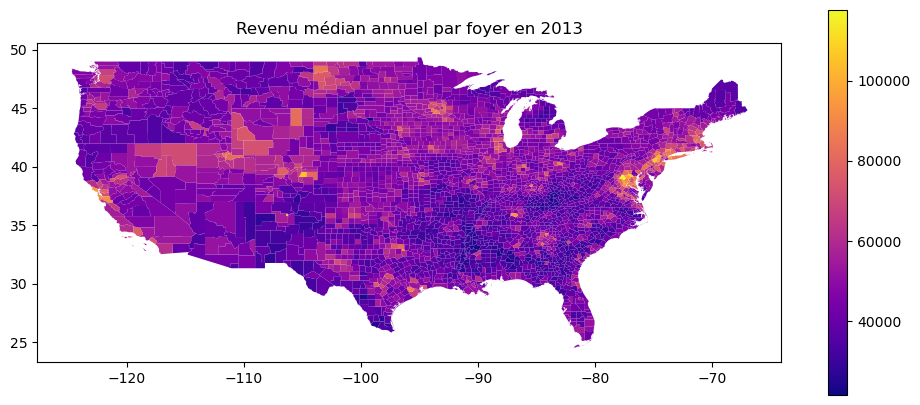

In [29]:
total_db_geo.plot(aspect = 1, figsize = (12,5), column = "med_h_income_year_2013", legend = True, cmap = "plasma", linewidth = 0.1)
plt.title("Revenu médian annuel par foyer en 2013")
plt.show()

Ces représentations sont difficilement lisibles car il y a beaucoup de comtés. Une solution est de classer les comtés et de les colorier en fonction de leur classement, en définissant par exemple 4 quantiles. 

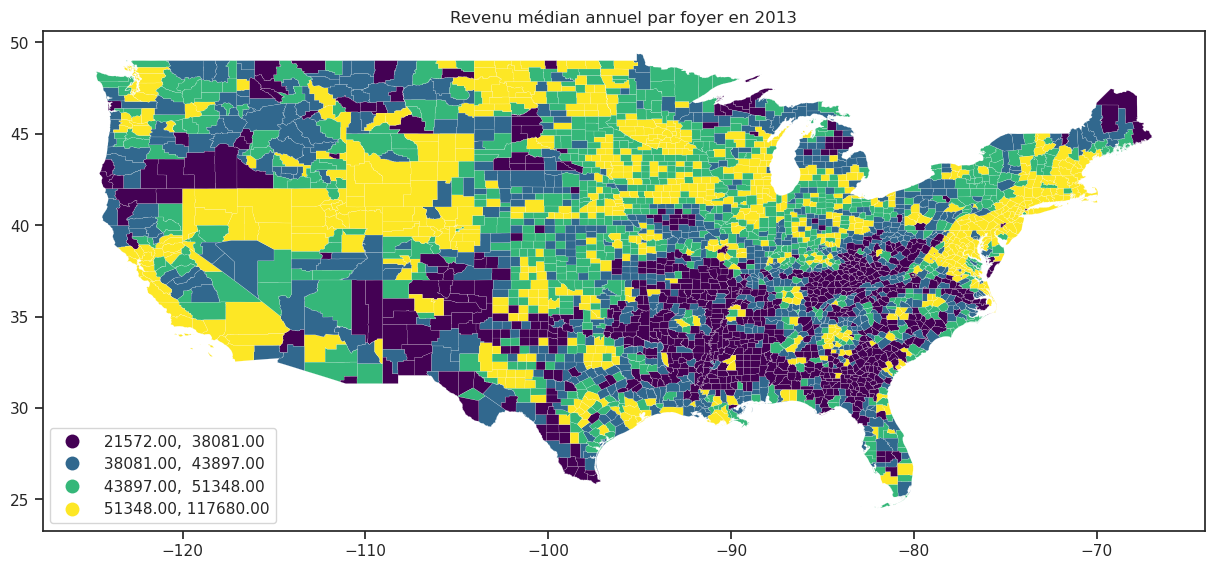

In [69]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "med_h_income_year_2013", legend = True, 
scheme = "Quantiles", k = 4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Revenu médian annuel par foyer en 2013")
plt.show()

Cette représentation a l'avantage de permettre de distinguer rapidement des groupes de comtés. Cependant, il faut garder en tête que la dernière catégorie recouvre beaucoup de valeurs différentes (du simple au double).

On voit sur cette carte que les comtés du Sud-Ouest sont ceux avec le revenu médian le plus faible, alors que les plus rivhes se situent surtout au Nord.

Text(0.5, 0, 'Revenu annuel médian par foyer en 2013')

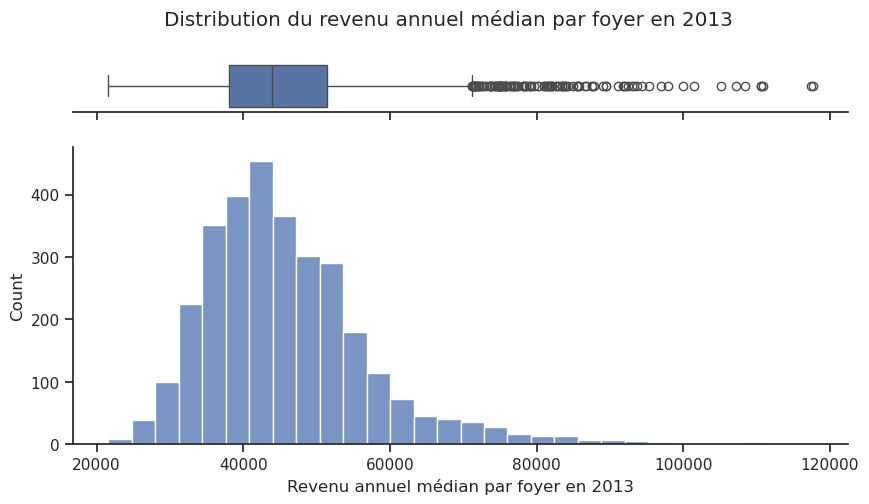

In [68]:
sns.set(style="ticks")
x = total_db_geo["med_h_income_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (10, 5), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.suptitle("Distribution du revenu annuel médian par foyer en 2013")
ax_hist.set_xlabel('Revenu annuel médian par foyer en 2013')

La distribution du revenu annuel médian par foyer en 2013 semble suivre une loi log-normale, car elle ressemble à une normale avec une plus grande queue à droite. Le box-plot semble confirmer cela : les "valeurs aberrantes" ne sont présentes qu'à droite de la distribution.

## Proportion de détenteurs d'un bachelor

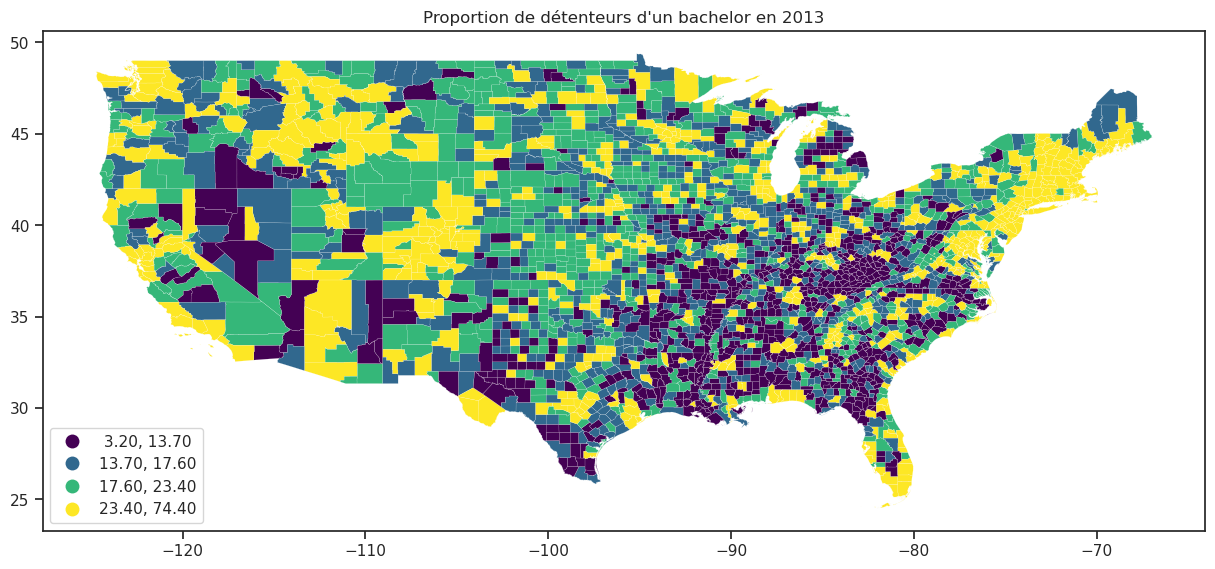

In [59]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "bachelors_deg_year_2013", legend = True, scheme = "QUANTILES", 
k=4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Proportion de détenteurs d'un bachelor en 2013")
plt.show()

A nouveau, le Nord-Est est privilégié, avec la plus grosse part de détententeurs de bachelors. Le Sud-Est est encore une fois défavorisé, avec preque tout le premier quantile situé à cet endroit.

Text(0.5, 0, 'Proportion de diplômés de bachelor en 2013')

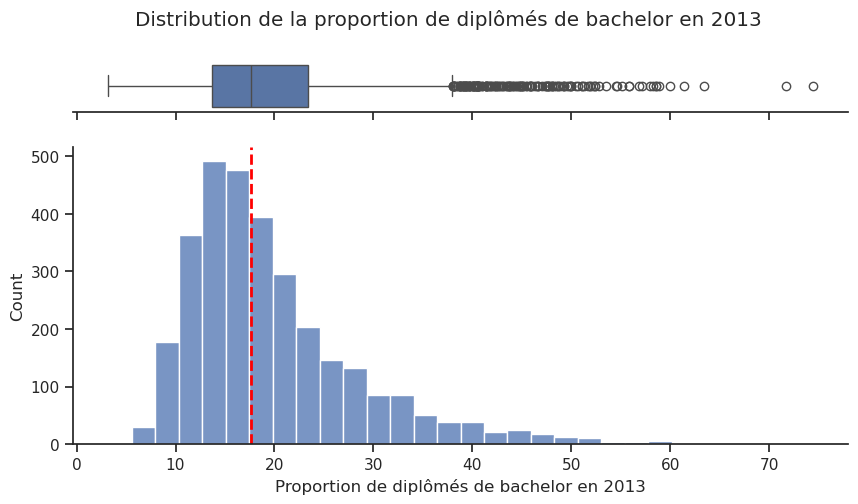

In [72]:
sns.set(style="ticks")
x = total_db_geo["bachelors_deg_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (10, 5), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution de la proportion de diplômés de bachelor en 2013")
ax_hist.set_xlabel('Proportion de diplômés de bachelor en 2013')

On obtient encore une fois une courbe normale biaisé vers la droite de la distribution. Les valeurs aberrantes sont toutes situées de ce côté de la distribution. On voit bien sur le boxplot les inégalités très importantes qui peut exister entre les comtés. Cela est assez logique : le comté étant un découpage relativement fin du territoire américain, il n'est pas étonnant de grosses variations à cette échelle.

## Bénéficiaires du programme SNAP

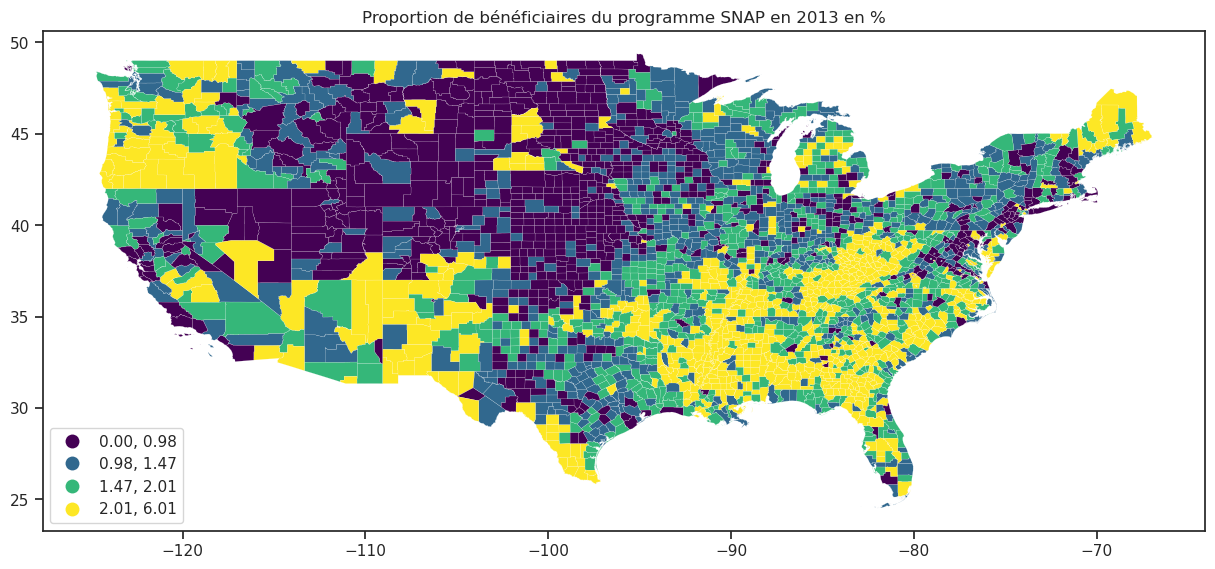

In [74]:
total_db_geo["snap_share_year_2013"] = total_db_geo["snap_beneficiaries_year_2013"] / total_db_geo["resident_pop_year_2013"] / 100
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "snap_share_year_2013", legend = True, scheme = "QUANTILES", 
k=4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Proportion de bénéficiaires du programme SNAP en 2013 en %")
plt.show()

On retrouve la distinction Nord-Est privilégié / Sud-Est défavorisé ici encore : les taux de bénéficaires les plus bas sont situés au Nord-Est et les plus importants dnas le Sud, et en particulier le Sud-Est. Le Nord et le centre du pays font partie des deux premiers quartiles, alors que le Nord-Ouest fait également partie des territoires avec la plus grande part de bénéficiaires.

Text(0.5, 0, 'Proportion de bénéficiaire du SNAP en 2013 en %')

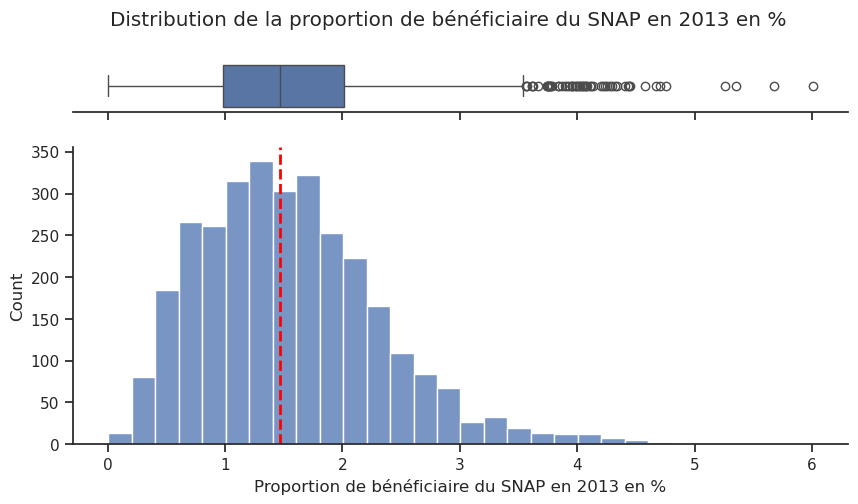

In [76]:

sns.set(style="ticks")
x = total_db_geo["snap_share_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution de la proportion de bénéficiaire du SNAP en 2013 en %")
ax_hist.set_xlabel('Proportion de bénéficiaire du SNAP en 2013 en %')

On retrouve globalement la même forme de distribution, mais un peu plus étalée que les deux vues précédemment. Encore une fois, la courbe en cloche est biaisée vers la droite, où se situent toutes les valeurs aberrantes. 

## Taux de chômage

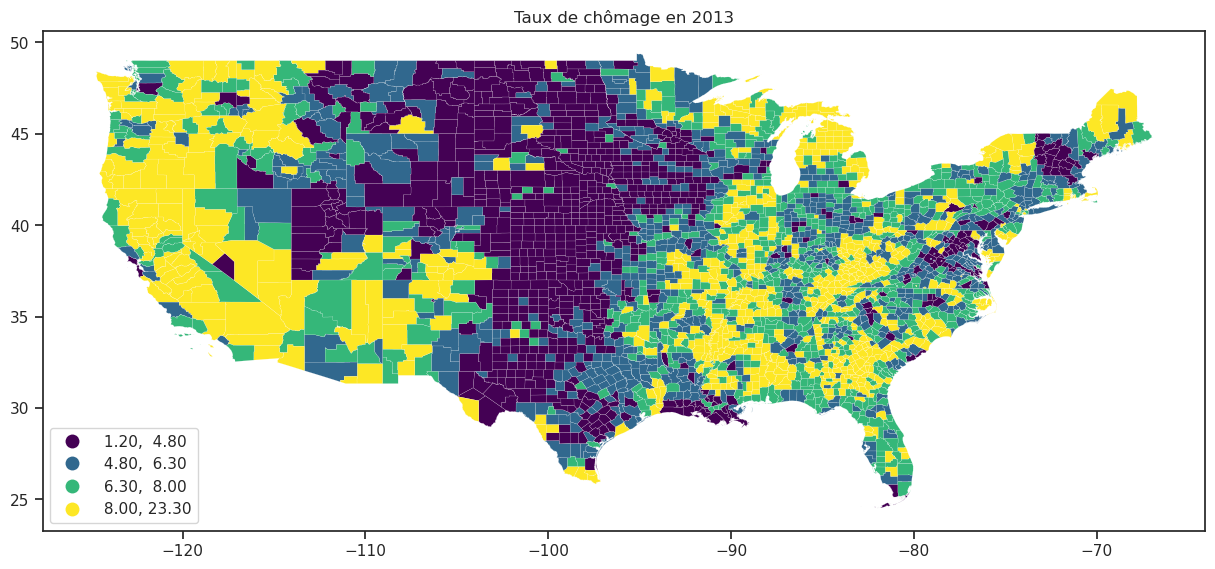

In [79]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "unemp_rate_year_2013", legend = True, scheme = "QUANTILES", k=4, 
linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Taux de chômage en 2013")
plt.show()

La répartition géographique du taux de chômage semble totalement différente des autres : toute la côte Ouest est dans le dernier quartile, et l'Est aussi, alors que c'est le centre qui a le taux de chômage le plus bas. Certaines zones connues pour leur désindustrialisation sont dans le dernier quartile, comme la région de Détroit par exemple.

Text(0.5, 0, 'Taux de chômage en 2013')

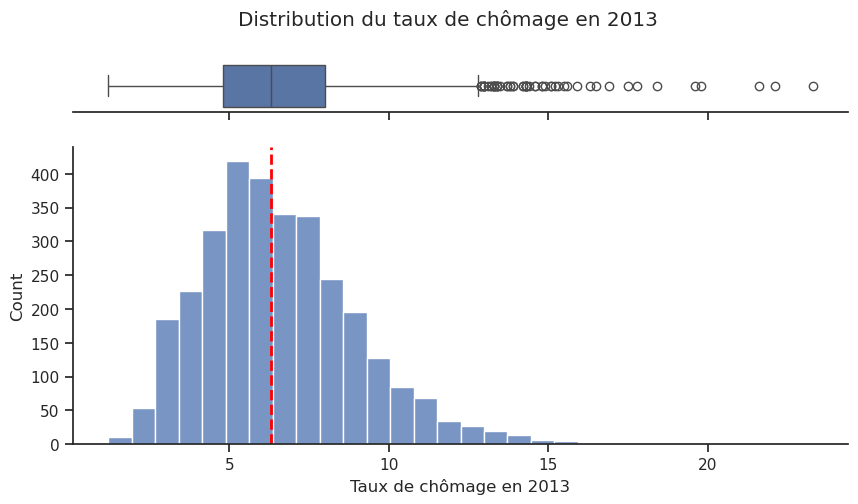

In [81]:
sns.set(style="ticks")
x = total_db_geo["unemp_rate_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution du taux de chômage en 2013")
ax_hist.set_xlabel('Taux de chômage en 2013')

La distribution a la forme que nous avons vu déjà plusieurs fois. On remarque que les valuers aberrantes sont de plus en plus espacées au fur et à mesure qu'elles augmentent.

## Comparaison des différentes années

Nous avons les données sur plusieurs années (entre 2013 et 2018, années de constitution de la base des incidents). Plutôt que faire une carte par année, nous allons vérifier que les données ne changent pas trop d'une année à l'autre, et que les tendances générales restent stables. Nous allons donc regarder les matrices de corrélation d'une même variable entre différentes années.

### Chômage

In [97]:
matrix = total_db_geo[["unemp_rate_year_2013", "unemp_rate_year_2014", "unemp_rate_year_2015", 
"unemp_rate_year_2016", "unemp_rate_year_2017", "unemp_rate_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des taux de chômage", labels = {"color" : "Corrélation"})
fig.show()

On voit que toutes les corrélations sont supérieures à 80%, ce qui est relativement important et laisse penser que le taux de chômage reste relativement stable sur les années.

Text(0.5, 1, 'Hexbin du taux de chômage entre 2013 et 2018')

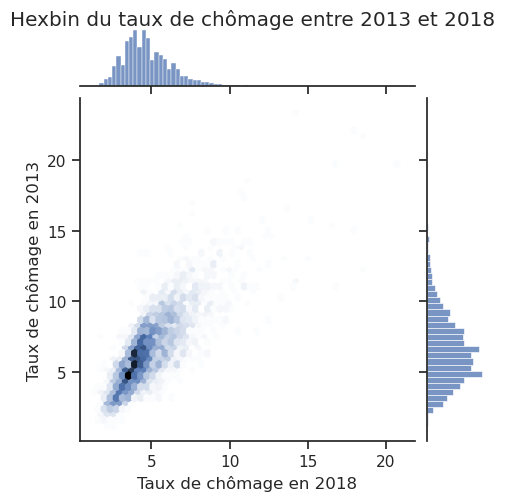

In [114]:
sns.set_theme(style="ticks")
x = total_db_geo["unemp_rate_year_2018"]
y = total_db_geo["unemp_rate_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex", height = 5)
joint_plot.set_axis_labels("Taux de chômage en 2018", "Taux de chômage en 2013")
joint_plot.fig.suptitle("Hexbin du taux de chômage entre 2013 et 2018", y =1)

Cet hexbin montre que les taux de chômage entre 2013 et 2018 sont effectivement positivement corrélés. On remarque également qu'il n'y a que très peu de comtés ayant un faible taux à une année et un taux important pour l'autre année, ce qui suggère que les analyses resteront valables peu importe l'année retenue pour cette variable. Il convient de vérifier cela pour les autres variables.

### Revenu annuel médian par foyer

In [99]:
matrix = total_db_geo[["med_h_income_year_2013", "med_h_income_year_2014", "med_h_income_year_2015", 
"med_h_income_year_2016", "med_h_income_year_2017", "med_h_income_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des revenues médians", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, 'Hexbin du revenu annuel médian par foyer entre 2013 et 2018')

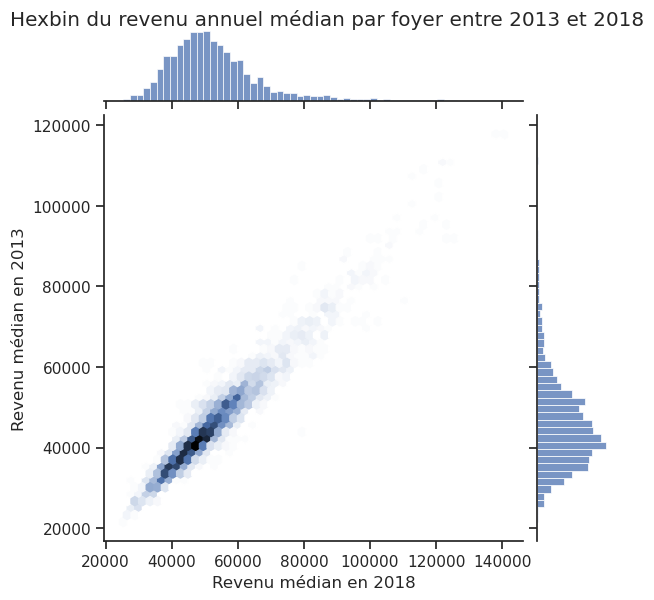

In [107]:
sns.set_theme(style="ticks")
x = total_db_geo["med_h_income_year_2018"]
y = total_db_geo["med_h_income_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Revenu médian en 2018", "Revenu médian en 2013")
joint_plot.fig.suptitle("Hexbin du revenu annuel médian par foyer entre 2013 et 2018", y = 1)

On observe la même chose que pour le chômage : les corrélations sont mêmes plus importantes puisque toutes supérieures à 95%. Le hexbin montre également cette quasi parfaite corrélation entre les deux années extrêmes, car tous les comtés sont situés sur la diagonale. Il y a donc très peu de comtés qui sont passés d'un revenu médian important à un revenu médian faible (ou l'inverse).

### Proportion de détenteurs d'un bachelor

In [103]:
matrix = total_db_geo[["bachelors_deg_year_2013", "bachelors_deg_year_2014", "bachelors_deg_year_2015", 
"bachelors_deg_year_2016", "bachelors_deg_year_2017", "bachelors_deg_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des parts de détenteurs de bachelor", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, "Hexbin de la part de détenteurs d'un bachelor entre 2013 et 2018")

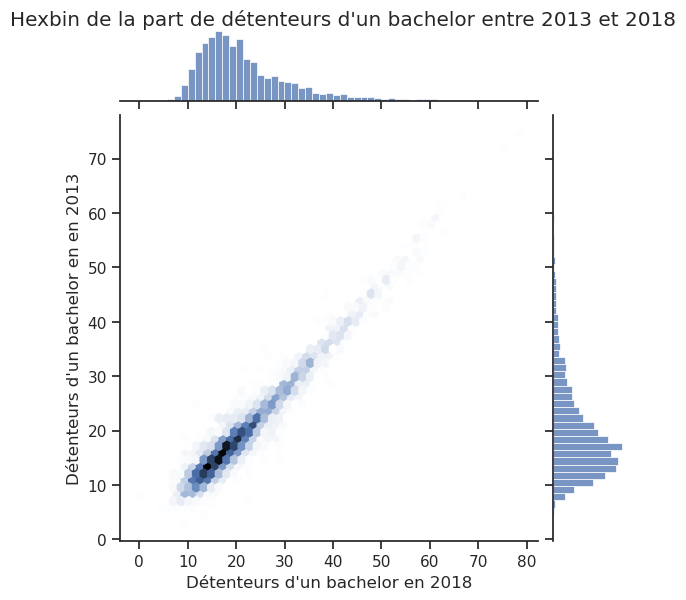

In [116]:
sns.set_theme(style="ticks")
x = total_db_geo["bachelors_deg_year_2018"]
y = total_db_geo["bachelors_deg_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Détenteurs d'un bachelor en 2018", "Détenteurs d'un bachelor en en 2013")
joint_plot.fig.suptitle("Hexbin de la part de détenteurs d'un bachelor entre 2013 et 2018", y =1)

Encore une fois, les données suggèrent qu'utiliser une année ou l'autre n'aura pas d'influence sur les résultats de l'analyse du fait de la similarité des années.

### Bénéficaires du programme SNAP

In [117]:
total_db_geo["snap_share_year_2013"] = total_db_geo["snap_beneficiaries_year_2013"] / total_db_geo["resident_pop_year_2013"] / 100
total_db_geo["snap_share_year_2014"] = total_db_geo["snap_beneficiaries_year_2014"] / total_db_geo["resident_pop_year_2014"] / 100
total_db_geo["snap_share_year_2015"] = total_db_geo["snap_beneficiaries_year_2015"] / total_db_geo["resident_pop_year_2015"] / 100
total_db_geo["snap_share_year_2016"] = total_db_geo["snap_beneficiaries_year_2016"] / total_db_geo["resident_pop_year_2016"] / 100
total_db_geo["snap_share_year_2017"] = total_db_geo["snap_beneficiaries_year_2017"] / total_db_geo["resident_pop_year_2017"] / 100
total_db_geo["snap_share_year_2018"] = total_db_geo["snap_beneficiaries_year_2018"] / total_db_geo["resident_pop_year_2018"] / 100


In [118]:
matrix = total_db_geo[["snap_share_year_2013", "snap_share_year_2014", "snap_share_year_2015", 
"snap_share_year_2016", "snap_share_year_2017", "snap_share_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des parts de bénéficiaires du SNAP", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, 'Hexbin de la part bénéficaires du SNAP entre 2013 et 2018')

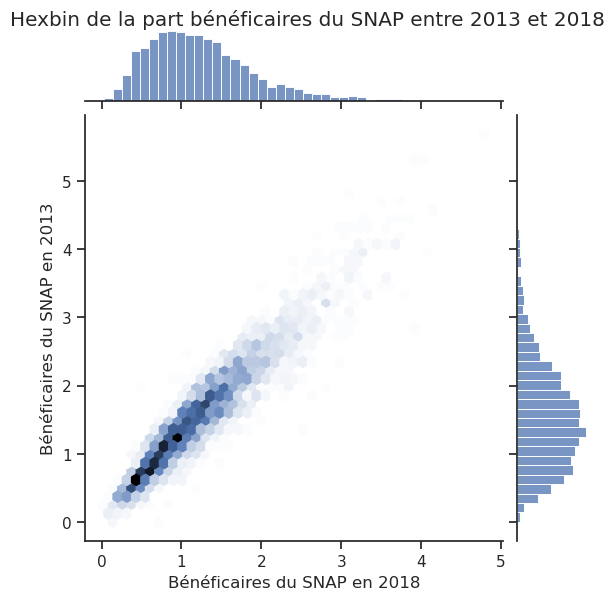

In [119]:
sns.set_theme(style="ticks")
x = total_db_geo["snap_share_year_2018"]
y = total_db_geo["snap_share_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Bénéficaires du SNAP en 2018", "Bénéficaires du SNAP en 2013")
joint_plot.fig.suptitle("Hexbin de la part bénéficaires du SNAP entre 2013 et 2018", y =1)

Même si la diagonale est plus étalée en haut à droite (donc quand les valeurs sont relativement importantes), rien ne semble indiquer qu'il y a des différences significatives dans la structure des données entre ces deux années.